# Survey Data Comparison

In this file, the questions from Abram Miller's *Improving Research Software Engineering in Mathematics* (IRSEM) survey are compared directly to the survey conducted by Carver et. al. (URSSI). 

##### Load data and functions:

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

IRSEM = pd.read_csv('../data/IRSEM_Results.csv')
URSSI = pd.read_csv('../data/URSSI_survey_anonymized20210930.csv')

In [53]:
### print functions ###

# function: print the answer counts and percentage for a given question
def print_question(question="Q0.1", survey = 0, percentages = True):
    if (survey == 0 or survey == 1):
        questions = IRSEM[question][2:]
        if (percentages):
            df = pd.concat([questions.value_counts(), 
                            questions.value_counts(normalize=True).round(2)], 
                            axis = 1, keys=["IRSEM: counts", "percentages"])
        else:
            df = pd.concat([questions.value_counts()], axis = 1, keys=["IRSEM: counts"])
        print (df)

    if (survey == 0): print("\n - - - - -\n")

    if (survey == 0 or survey == 2):
        questions = URSSI[question][2:]
        if (percentages):
            df = pd.concat([questions.value_counts(), 
                            questions.value_counts(normalize=True).round(2)], 
                            axis = 1, keys=["URSSI: counts", "percentages"])
        else:
            df = pd.concat([questions.value_counts()], axis = 1, keys=["URSSI: counts"])
        print (df)

# Print a set of questions (Likert Matrix)
def print_question_set(question = "", statements = [], survey = 0, percentages = True):
    div = "___________________"
    for i, statement in enumerate(statements): 
        print(statement + ":\n")
        print_question(question + "_" + str(i + 1), survey=survey, percentages=percentages)
        if (i < len(statements) - 1):
            print("\n", div*3, "\n")


### these functions are relevant to the multiple choice questions ###

# function: find counts of each answer type on each question
def get_ans_counts(questions):
    ANSWERCOUNTS = {category: [] for category in Answer_types}
    for label, data in questions:
        for category in Answer_types:
            count = data.value_counts().get(category, 0)
            ANSWERCOUNTS[category].append(count)
    #print(ANSWERCOUNTS)
    return ANSWERCOUNTS

# function: get the percentages from the total counts of each category's responses
def get_percentages(questions):
    PERCENTAGES = {category: [] for category in Answer_types}
    i = 0
    for label, data in questions:
        for category in Answer_types:
            percent = data.value_counts(normalize=True).get(category, 0) * 100
            PERCENTAGES[category].append(percent)
        i += 1
    #print(totals)
    return PERCENTAGES



# Respondent Demographics 

##### Q0.1: Which profile matches the work you perform?

<strong>Researchers (pure user) </strong>&ndash; I primarily use software to do my research. I have contributed to local software development, but only in a limited capacity. I have the ability to recognize and report bugs. I don&rsquo;t build new software myself, but I occasionally modify existing software for my own needs.

<strong>Developers (pure software developer)</strong> &ndash; I primarily write software for others to use. I contribute to collaborative software projects. I maintain a package or distribution

<strong>Combination</strong> &ndash; I have attributes of both &ldquo;Researchers&rdquo; and &ldquo;Developers.&rdquo; I both use software for my own research and write software that other researchers use for their research

             IRSEM: counts  percentages
Q0.1                                   
Combination             27         0.59
Researchers             15         0.33
Developers               4         0.09

 - - - - -

             URSSI: counts  percentages
Q0.1                                   
Combination            544         0.49
Researchers            473         0.43
Developers              89         0.08


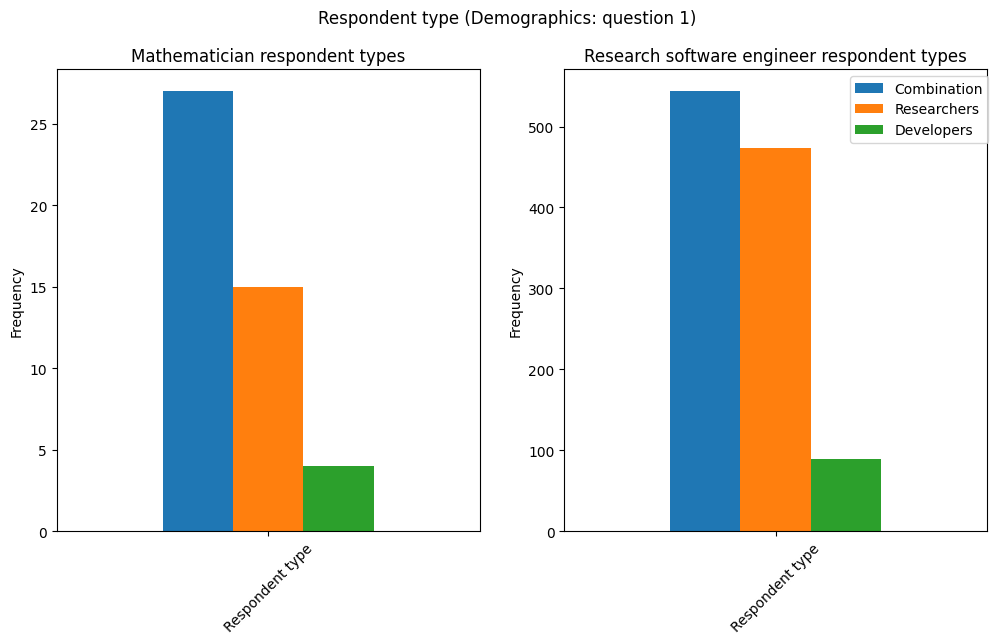

In [54]:
# Print raw data
print_question("Q0.1")

# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Respondent type', survey["Q0.1"][2:])]

# possible text answers
Answer_types = [
    'Combination',
    'Researchers',
    'Developers']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_ans_counts(QUESTIONS), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_ans_counts(QUESTIONS), index=[label[0] for label in QUESTIONS])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Respondent type (Demographics: question 1)')

ax1 = df1.plot.bar(rot=0, ax=ax1)
ax1.set_title('Mathematician respondent types')
ax1.set_ylabel('Frequency')
ax1.tick_params('x',labelrotation=45)
#ax1.set_yticks(np.arange(0, 100.1, 10))
ax1.get_legend().remove()

ax2 = df2.plot.bar(rot=0, ax=ax2)
ax2.set_title('Research software engineer respondent types')
ax2.set_ylabel('Frequency')
ax2.tick_params('x',labelrotation=45)
#ax2.set_yticks(np.arange(0, 100.1, 10))

# edit parameters
plt.legend(bbox_to_anchor=(1.02, 1))
plt.gcf().set_size_inches(12, 6)
plt.show()


##### Q0.2: What type of organization do you work for?

Educational institution

National lab

Industry

Other

In [55]:
print_question("Q0.2", percentages=True)

                         IRSEM: counts  percentages
Q0.2                                               
Educational institution             35         0.76
Other:                               5         0.11
Industry                             5         0.11
National lab                         1         0.02

 - - - - -

                         URSSI: counts  percentages
Q0.2                                               
Educational institution            901         0.86
National lab                        62         0.06
Other                               49         0.05
Industry                            39         0.04


##### Q0.3: In which country do you currently reside?

In [56]:
print_question("Q0.3")

                                                    IRSEM: counts  percentages
Q0.3                                                                          
United States of America                                       28         0.61
Germany                                                         4         0.09
France                                                          2         0.04
Austria                                                         2         0.04
Canada                                                          2         0.04
Italy                                                           2         0.04
Switzerland                                                     1         0.02
Colombia                                                        1         0.02
South Korea                                                     1         0.02
United Kingdom of Great Britain and Northern Ir...              1         0.02
Australia                                           

##### Q0.4: What is your professional title?

Postdoc

Graduate Student

Research Engineer

Research Faculty

Research Software Engineer

Manager

Other

In [57]:
print_question("Q0.4")

                            IRSEM: counts  percentages
Q0.4                                                  
Faculty                                17         0.37
Postdoc                                 9         0.20
Graduate Student                        8         0.17
Other                                   6         0.13
Research Software Engineer              3         0.07
Research Faculty                        2         0.04
Research Engineer                       1         0.02

 - - - - -

                            URSSI: counts  percentages
Q0.4                                                  
Faculty                               669         0.64
Other                                 149         0.14
Research Faculty                       59         0.06
Research Software Engineer             43         0.04
Graduate Student                       39         0.04
Manager                                38         0.04
Postdoc                                36         0.

##### Q0.5: What is you age?

19 - 24

25 - 34

35 - 44

45 - 54

55 - 64

65 - 74

75 - 84

85 or older

In [58]:
print_question("Q0.5")

         IRSEM: counts  percentages
Q0.5                               
35 - 44             21         0.46
25 - 34             15         0.33
19 - 24              3         0.07
45 - 54              3         0.07
65 - 74              2         0.04
55 - 64              1         0.02
75 - 84              1         0.02

 - - - - -

             URSSI: counts  percentages
Q0.5                                   
35 - 44                366         0.35
45 - 54                254         0.24
55 - 64                184         0.18
25 - 34                162         0.16
65 - 74                 53         0.05
18 - 24                 10         0.01
75 - 84                  8         0.01
85 or older              1         0.00


##### Q0.6: How many years have you worked in research?

Less than 1 year

1 - 5 years

6 - 10 years

11 - 15 years

16 - 20 years

20 or more years

In [59]:
print_question("Q0.6")

                  IRSEM: counts  percentages
Q0.6                                        
11 - 15 years                11         0.24
1 - 5 years                  11         0.24
6 - 10 years                  9         0.20
20 or more years              6         0.13
16 - 20 years                 5         0.11
Less than 1 year              4         0.09

 - - - - -

                    URSSI: counts  percentages
Q0.6                                          
More than 20 years            410         0.39
11 - 15 years                 212         0.20
16-20 years                   178         0.17
6 - 10 years                  162         0.16
1 - 5 years                    76         0.07
Less than 1 year                5         0.00


##### Q0.7: What is your gender?

Male

Female

Non-binary / third gender

Prefer not to say

In [60]:
print_question("Q0.7")

                   IRSEM: counts  percentages
Q0.7                                         
Male                          39         0.85
Female                         6         0.13
Prefer not to say              1         0.02

 - - - - -

                      URSSI: counts  percentages
Q0.7                                            
Male                            734         0.70
Female                          268         0.26
Prefer not to answer             36         0.03
Other                             4         0.00


##### Q0.8: How often do you work on projects that have the following team size?

|                   | Never | Sometimes | About half the time | Most of the time | Always |
| ----------------- | - | - | - | - | - |
| **1 person**      | o | o | o | o | o |
| **2 - 5 people**  | o | o | o | o | o |
| **6 - 20 people** | o | o | o | o | o |
| **20+ people**    | o | o | o | o | o |

In [61]:
print_question_set("Q0.8", ["1 Person", 
                            "2 - 5 people", 
                            "6-10 people", 
                            "20+ people"])



1 Person:

                     IRSEM: counts  percentages
Q0.8_1                                         
Sometimes                       22         0.48
Most of the time                10         0.22
About half the time              9         0.20
Never                            4         0.09
Always                           1         0.02

 - - - - -

                     URSSI: counts  percentages
Q0.8_1                                         
Sometimes                      477         0.52
About half the time            150         0.16
Most of the time               120         0.13
Never                          115         0.13
Always                          55         0.06

 _________________________________________________________ 

2 - 5 people:

                     IRSEM: counts  percentages
Q0.8_2                                         
Sometimes                       17         0.37
Most of the time                15         0.33
About half the time             12 

# RQ1: Software Development Practices
What activities do research software developers spend their time on, and how does this impact the perceived quality and long-term accessibility of research software?

For the following questions, think about your most recently completed software project and answer based on your experiences in that project.

[Note: This section only appears for respondent types “Developer” or “Combination”]

##### Q1.1: To what extent was the software targeted at each of these groups of users?

|                              | Not at all | Secondary target | Primary target |
| ---------------------------- | - | - | - |
| **Just me**                  | o | o | o |
| **Just my team**             | o | o | o |
| **Just my discipline**       | o | o | o |
| **More than one discipline** | o | o | o |

In [62]:
print_question_set("Q1.1", ["Just me", 
                            "Just my team", 
                            "Just my discipline", 
                            "More than one discipline"])

Just me:

                  IRSEM: counts  percentages
Q1.1_1                                      
Not at all                    9         0.41
Primary target                9         0.41
Secondary target              4         0.18

 - - - - -

                  URSSI: counts  percentages
Q1.1_1                                      
Not at all                  156         0.38
Primary target              133         0.32
Secondary target            122         0.30

 _________________________________________________________ 

Just my team:

                  IRSEM: counts  percentages
Q1.1_2                                      
Secondary target             11         0.50
Not at all                   10         0.45
Primary target                1         0.05

 - - - - -

                  URSSI: counts  percentages
Q1.1_2                                      
Primary target              205         0.48
Secondary target            150         0.35
Not at all                   70 

##### Q1.2: What percent of your time did you actually spend in the following activities? *(total should be 100%)*

Requirements gathering / documentation:

Software architecture / design:

Coding:

Testing:

Debugging:

Maintenance:

Documentation:

Meetings:

Training:

Other:

##### Q1.3: What percent of time would you have <u>**liked**</u> to have spent in each activity?
*(total should be 100%)*

Requirements gathering / documentation:

Software architecture / design:

Coding:

Testing:

Debugging:

Maintenance:

Documentation:

Meetings:

Training:

Other:

##### Q1.4: Which of the following types of testing did you employ?

|                 | Frequently | Somewhat | Rarely | Never |
| --------------- | - | - | - | - |
| **Unit**        | o | o | o | o |
| **Integration** | o | o | o | o |
| **System**      | o | o | o | o |
| **User**        | o | o | o | o |
| **Regression**  | o | o | o | o |

Unit:

            IRSEM: counts  percentages
Q1.4_1                                
Frequently              9         0.41
Somewhat                6         0.27
Rarely                  4         0.18
Never                   3         0.14

 - - - - -

            URSSI: counts  percentages
Q1.4_1                                
Frequently            231         0.51
Somewhat              108         0.24
Rarely                 62         0.14
Never                  52         0.11

 _________________________________________________________ 

Integration:

            IRSEM: counts  percentages
Q1.4_2                                
Frequently             10         0.45
Somewhat                6         0.27
Never                   4         0.18
Rarely                  2         0.09

 - - - - -

            URSSI: counts  percentages
Q1.4_2                                
Somewhat              171         0.38
Frequently            155         0.34
Rarely                 69        

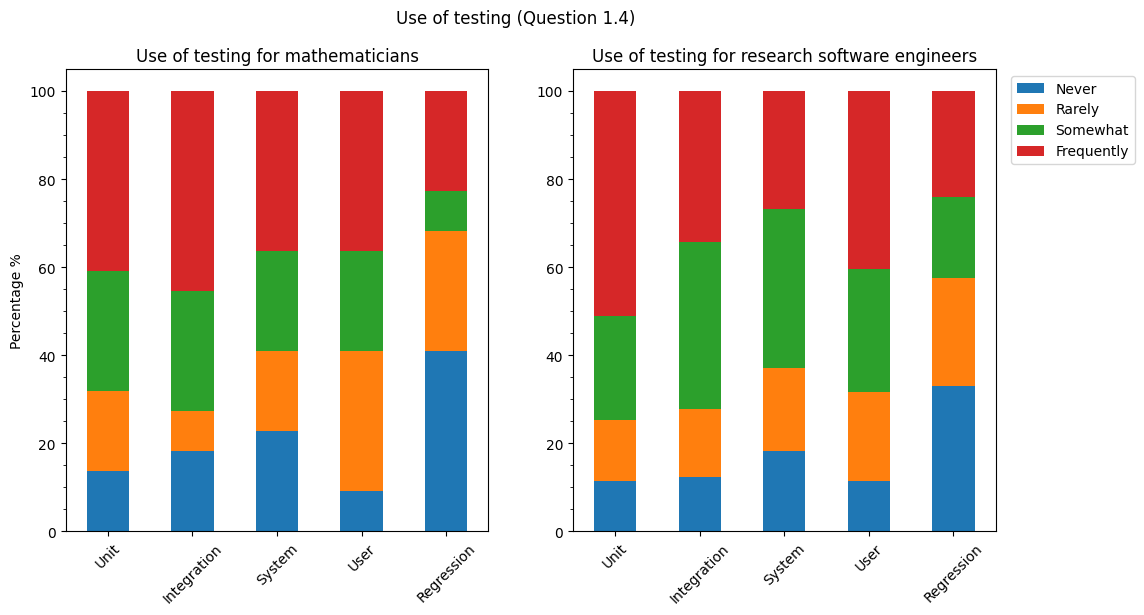

In [63]:
print_question_set("Q1.4", ["Unit", 
                            "Integration", 
                            "System", 
                            "User", 
                            "Regression"])


# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Unit',            survey["Q1.4_1"][2:]), 
            ('Integration',     survey["Q1.4_2"][2:]), 
            ('System',          survey["Q1.4_3"][2:]), 
            ('User',            survey["Q1.4_4"][2:]), 
            ('Regression',      survey["Q1.4_5"][2:])]

# possible text answers
Answer_types = [
    'Never',
    'Rarely',
    'Somewhat',
    'Frequently']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_percentages(QUESTIONS), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_percentages(QUESTIONS), index=[label[0] for label in QUESTIONS])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Use of testing (Question 1.4)') # Title

ax1 = df1.plot.bar(rot=0, ax=ax1, stacked = True)
ax1.set_title('Use of testing for mathematicians')
ax1.set_ylabel('Percentage %')
ax1.tick_params('x',labelrotation=45)
ax1.set_yticks(np.arange(0, 100.1, 5), minor=True)
ax1.get_legend().remove()

ax2 = df2.plot.bar(rot=0, ax=ax2, stacked = True)
ax2.set_title('Use of testing for research software engineers')
ax2.set_ylabel('')
ax2.tick_params('x',labelrotation=45)
ax2.set_yticks(np.arange(0, 100.1, 5), minor=True)

# edit parameters
plt.legend(bbox_to_anchor=(1.02, 1))
plt.gcf().set_size_inches(12, 6)
plt.show()

##### Q1.5: Did you release the software under an open-source license?
Yes / No

In [64]:
print_question("Q1.5")

      IRSEM: counts  percentages
Q1.5                            
Yes              21         0.95
No                1         0.05

 - - - - -

      URSSI: counts  percentages
Q1.5                            
Yes             349         0.74
No              122         0.26


# RQ2: Development Infrastructure and Tools
What tools do research software developers use and what additional tools are needed to support sustainable development practices?

[Note: This section only appears for respondent types “Developer” or “Combination”]

The following questions are about software development infrastructure, tools, and practices with which you may use or are familiar.

##### Q2.1: In the last 5 years, how much experience do you have with each of the following types of projects:

|     | None | 1-3 projects | 4+ projects
| --- | - | - | - |
| <strong>Single developer</strong> | o | o | o |
| <strong>Co-located team </strong>(i.e. a team, located in a single place or institution with well-coordinated funding/organization) | o | o | o |
| <strong>Distributed team</strong> (i.e. a well-defined team, located in multiple places or institutions with well-coordinated funding/organization) | o | o | o |
| <strong>Open-source community</strong> (i.e. a group of developers who are distributed and working under multiple independant funding sources) | o | o | o |

In [65]:
print_question_set("Q2.1", ["Single developer", 
                            "Co-located team",
                            "Distributed team",
                            "Open-source community"])

Single developer:

              IRSEM: counts  percentages
Q2.1_1                                  
1-3 projects             11         0.58
4+ projects               8         0.42

 - - - - -

              URSSI: counts  percentages
Q2.1_1                                  
1-3 projects            222         0.69
4+ projects             100         0.31

 _________________________________________________________ 

Co-located team:

              IRSEM: counts  percentages
Q2.1_2                                  
1-3 projects             11         0.73
4+ projects               4         0.27

 - - - - -

              URSSI: counts  percentages
Q2.1_2                                  
1-3 projects            260         0.73
4+ projects              96         0.27

 _________________________________________________________ 

Distributed team:

              IRSEM: counts  percentages
Q2.1_3                                  
1-3 projects             10         0.67
4+ projects    

##### Q2.2: How well do current tools support each of the following activities?

|   | Extremely supported | Very supported | Moderately supported | Slightly supported | Not supported at all |
| - | - | - | - | - | - |
| **Requirements gathering / documentation** | o | o | o | o | o |
| **Software architecture / design** | o | o | o | o | o |
| **Coding** | o | o | o | o | o |
| **Testing** | o | o | o | o | o |
| **Debugging** | o | o | o | o | o |
| **Maintenance** | o | o | o | o | o |
| **Documentation** | o | o | o | o | o |

Figure 4: Availability of tool support. (Question 2.2)

Requirements:

                      IRSEM: counts  percentages
Q2.2_1                                          
Moderately supported              9         0.45
Slightly supported                6         0.30
Very supported                    2         0.10
Not supported at all              2         0.10
Extremely supported               1         0.05

 - - - - -

                      URSSI: counts  percentages
Q2.2_1                                          
Slightly supported              155         0.36
Moderately supported            127         0.29
Not supported at all             91         0.21
Very supported                   51         0.12
Extremely supported              11         0.03

 _________________________________________________________ 

SW Arch/Design:

                      IRSEM: counts  percentages
Q2.2_2                                          
Moderately supported              7         0.35
Slightly supported                6         0.30
Very suppor

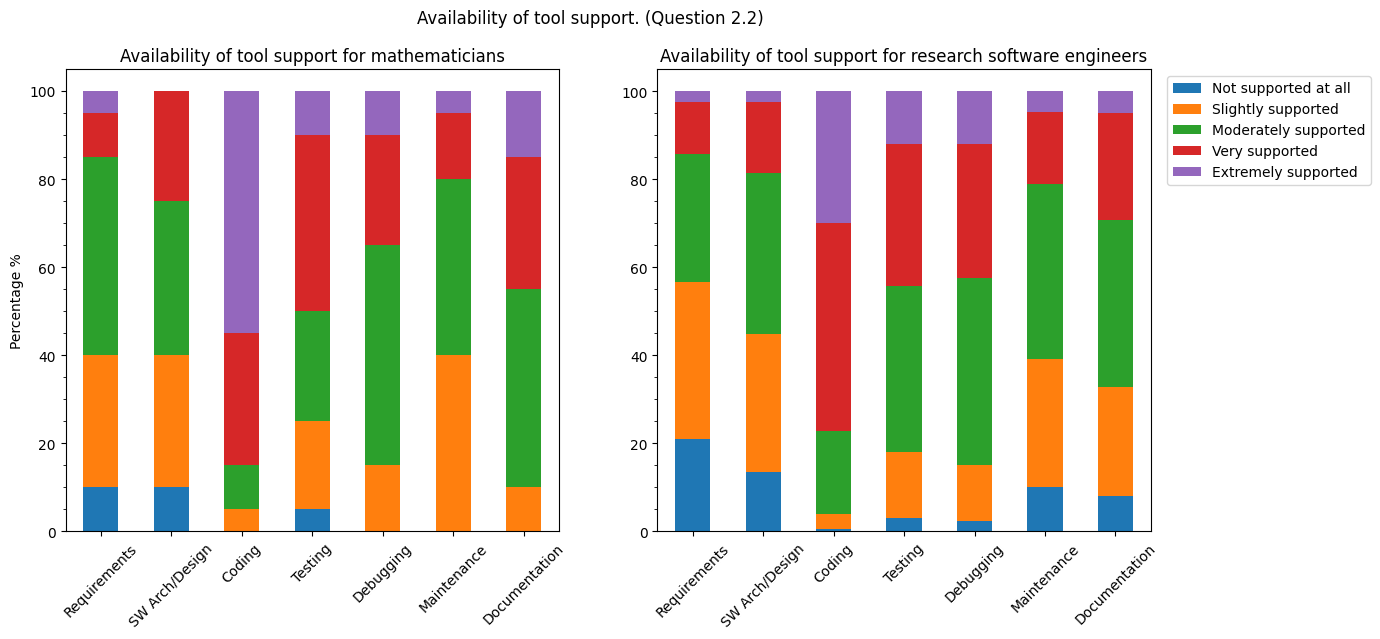

In [66]:

print_question_set("Q2.2", ['Requirements', 
                            'SW Arch/Design', 
                            'Coding', 
                            'Testing',
                            'Debugging',
                            'Maintenance',
                            'Documentation'])

# select question / question segments
def set_questions(survey):
    return [('Requirements',            survey["Q2.2_1"][2:]), 
            ('SW Arch/Design',          survey["Q2.2_2"][2:]), 
            ('Coding',                  survey["Q2.2_3"][2:]), 
            ('Testing',                 survey["Q2.2_4"][2:]), 
            ('Debugging',               survey["Q2.2_5"][2:]), 
            ('Maintenance',             survey["Q2.2_6"][2:]), 
            ('Documentation',           survey["Q2.2_7"][2:])]

# possible text answers
Answer_types = [
    'Not supported at all',
    'Slightly supported',
    'Moderately supported',
    'Very supported', 
    'Extremely supported']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_percentages(QUESTIONS), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_percentages(QUESTIONS), index=[label[0] for label in QUESTIONS])

# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Availability of tool support. (Question 2.2)')

ax1 = df1.plot.bar(rot=0, ax=ax1, stacked = True)
ax1.set_title('Availability of tool support for mathematicians')
ax1.set_ylabel('Percentage %')
ax1.tick_params('x',labelrotation=45)
ax1.set_yticks(np.arange(0, 100.1, 5), minor=True)
ax1.get_legend().remove()

ax2 = df2.plot.bar(rot=0, ax=ax2, stacked = True)
ax2.set_title('Availability of tool support for research software engineers')
ax2.set_ylabel('')
ax2.tick_params('x',labelrotation=45)
ax2.set_yticks(np.arange(0, 100.1, 5), minor=True)

# edit parameters
#plt.grid(visible=None, which='both', axis='y')
plt.legend(bbox_to_anchor=(1.02, 1))
plt.gcf().set_size_inches(14, 6)
plt.show()


# RQ3: Training
What training is available to research software developers and does this training meet their needs?

The following questions are aimed to help us understand where developers may have recaived formal or informal training for software development. 

##### Q3.1: Have you received training for software development?
Yes / No

In [67]:
print_question("Q3.1")

      IRSEM: counts  percentages
Q3.1                            
No               21         0.58
Yes              15         0.42

 - - - - -

      URSSI: counts  percentages
Q3.1                            
No              567         0.65
Yes             302         0.35


##### Q3.1.1: Where? (if answered yes to 3.1)

**Multiple select:**

Class / school

Carpentry

Online self-directed

Other

In [68]:
print_question("Q3.1.1")

                                     IRSEM: counts  percentages
Q3.1.1                                                         
Class / school,Online self-directed              6         0.40
Class / school                                   6         0.40
Online self-directed,Other                       1         0.07
Online self-directed                             1         0.07
Other                                            1         0.07

 - - - - -

                                               URSSI: counts  percentages
Q3.1.1                                                                   
Class / school                                           115         0.38
Class / school,Online self-directed                       92         0.30
Online self-directed                                      22         0.07
Other                                                     19         0.06
Class / school,Carpentry,Online self-directed             16         0.05
Class / school,Carpen

##### Q3.2: Do you believe there are sufficient opportunities available for exploring or obtaining new software skills?
Yes / No / Don't know

In [69]:
print_question("Q3.2")

            IRSEM: counts  percentages
Q3.2                                  
Yes                    19         0.53
No                     10         0.28
Don't know              7         0.19

 - - - - -

            URSSI: counts  percentages
Q3.2                                  
Yes                   451         0.52
No                    233         0.27
Don't know            181         0.21


##### Q3.3: Do you have sufficient time to take the types of training you need to be successful?
Yes / No

In [70]:
print_question("Q3.3")

      IRSEM: counts  percentages
Q3.3                            
Yes              18          0.5
No               18          0.5

 - - - - -

      URSSI: counts  percentages
Q3.3                            
No              642         0.74
Yes             222         0.26


##### Q3.4: For each of the following types of training (languages, development techniques, and project management), which mode of delivery do you prefer? Please select your top two modes of delivery preferences for each of the training types.

|   | Languages | Development techniques | Project Management|
| - | - | - | - | 
| **On-site custom training** | ▢ | ▢ | ▢ |
| **Workshops or short courses <em>(e.g.</em>, before or after a conference)** | ▢ | ▢ | ▢ |
| **Carpentries / software boot camps** | ▢ | ▢ | ▢ |
| **Summer schools (in-person or virtual)** | ▢ | ▢ | ▢ |
| **MOOCs (Massive Open Online Courses), webinars, or self-directed online courses** | ▢ | ▢ | ▢ |
| **Other** | ▢ | ▢ | ▢ |

In [71]:
print_question_set("Q3.4", ["On-site custom training", 
                            "Workshops or short courses (e.g., before or after a conference)", 
                            "Carpentries / software boot camps", 
                            "Summer schools (in-person or virtual)", 
                            "MOOCs (Massive Open Online Courses), webinars, or self-directed online courses",
                            "Other"])

On-site custom training:

                                                    IRSEM: counts  percentages
Q3.4_1                                                                        
Languages,Development techniques                                8         0.33
Languages,Development techniques,Project Manage...              5         0.21
Development techniques,Project Management                       5         0.21
Project Management                                              4         0.17
Languages                                                       2         0.08

 - - - - -

                                                    URSSI: counts  percentages
Q3.4_1                                                                        
Project Management                                            106         0.22
Languages,Development Techniques,Project Manage...             99         0.20
Development Techniques,Project Management                      81         0.17
Languages    

# RQ4: Funding and Institutional Support
**RQ4a: What is the available institutional support for research software development?**

**RQ4b: What sources of institutional funding are available to research software developers?**

The following questions are aimed at understanding your funding and institutional support for research software activities.

##### Q4.1: Have you ever included costs for software development in a funding proposal?
Yes / No

In [72]:
print_question("Q4.1")

      IRSEM: counts  percentages
Q4.1                            
No               28         0.78
Yes               8         0.22

 - - - - -

      URSSI: counts  percentages
Q4.1                            
No              451         0.54
Yes             385         0.46


##### Q4.1.1: Select all costs for software development in your funding proposals? (if answered yes to 4.1)
**Multiple Choice:**

For developing new software

For reusing existing software

For maintaining / sustaining software

In [73]:
print_question("Q4.1.1")

                                                    IRSEM: counts  percentages
Q4.1.1                                                                        
For developing new software                                     4         0.50
For maintaining / sustaining software                           2         0.25
For developing new software,For maintaining / s...              2         0.25

 - - - - -

                                                    URSSI: counts  percentages
Q4.1.1                                                                        
For developing new software                                   124         0.33
For developing new software,For reusing existin...            101         0.27
For developing new software,For maintaining / s...             81         0.21
For developing new software,For reusing existin...             37         0.10
For maintaining / sustaining software                          16         0.04
For reusing existing software,For maint

##### Q4.2: What percent of the funding for your software work comes from each of the following? (if Developer or Combination selected)
*(total should be 100%)*

NSF:

NIH:

DoD:

NASA:

NOAA:

Your own institution (e.g. faculty salary)

Other:



##### Q4.3: Does your institution provide support for your research software development activities in the following ways: (if Developer or Combination selected)

|   | No | Yes, but inadequate level of support | Yes, adequate level of support |
| - | - | - | - |
| **Financial** | o | o | o |
| **Infrastructural (repositories, computing, etc.)** | o | o | o |
| **Consulting / RSE support** | o | o | o |
| **Other** | o | o | o |

In [74]:
print_question_set("Q4.3", ["Financial",
                            "Infrastructural",
                            "Consulting / RSE support",
                            "Other"])

Financial:

                                      IRSEM: counts  percentages
Q4.3_1                                                          
Yes, adequate level of support                    8         0.42
No                                                7         0.37
Yes, but inadequate level of support              4         0.21

 - - - - -

                                      URSSI: counts  percentages
Q4.3_1                                                          
No                                              250         0.60
Yes, but inadequate level of support            110         0.26
Yes, adequate level of support                   60         0.14

 _________________________________________________________ 

Infrastructural:

                                      IRSEM: counts  percentages
Q4.3_2                                                          
Yes, adequate level of support                    7         0.37
Yes, but inadequate level of support              

##### Q4.4: Does your institution provide / support the research software development **<u>you need</u>** in the following ways: (if Developer or Combination selected)

|   | No | Yes, but inadequate level of support | Yes, adequate level of support |
| - | - | - | - |
| **Financial** | o | o | o |
| **Infrastructural (repositories, computing, etc.)** | o | o | o |
| **Consulting / RSE support** | o | o | o |
| **Other** | o | o | o |

In [75]:
print_question_set("Q4.4", ["Financial",
                            "Infrastructural",
                            "Consulting / RSE support",
                            "Other"])

Financial:

                                      IRSEM: counts  percentages
Q4.4_1                                                          
No                                                9         0.47
Yes, adequate level of support                    7         0.37
Yes, but inadequate level of support              3         0.16

 - - - - -

                                      URSSI: counts  percentages
Q4.4_1                                                          
No                                              240         0.64
Yes, but inadequate level of support             77         0.21
Yes, adequate level of support                   56         0.15

 _________________________________________________________ 

Infrastructural:

                                      IRSEM: counts  percentages
Q4.4_2                                                          
Yes, adequate level of support                    7         0.37
No                                                

##### Q4.5: What are the most significant gaps in your current institutional / organizational support of software related research?

# RQ5: Career Paths
What factors impact career advancement and hiring in research software?

The following questions are designed to provide information about career support and career pathways for research software developers.

##### Q5.1: In your institution, which of the following positions are available for people whose primary role is to develop research software?
**Multiple select:**

Postdoc

Research Software Engineer

Research Programmer

Software Developer

Programmer

Faculty

Research Faculty

Other

In [76]:
print_question("Q5.1")

                                                    IRSEM: counts  percentages
Q5.1                                                                          
Postdoc                                                         3         0.12
Postdoc,Research Faculty                                        2         0.08
Research Faculty                                                2         0.08
Postdoc,Faculty,Research Faculty                                1         0.04
Research Software Engineer                                      1         0.04
Postdoc,Research Software Engineer,Research Fac...              1         0.04
Postdoc,Faculty                                                 1         0.04
Research Software Engineer,Research Faculty                     1         0.04
Postdoc,Research Software Engineer,Research Pro...              1         0.04
Postdoc,Other                                                   1         0.04
Other                                               

##### Q5.2: Is there opportunity for career advancement (e.g., tenure, more senior positions) for people whose primary role is to develop research software at your institution?

Yes - in my current institution

No - I would have to move to another institution\

Don’t know

In [77]:
print_question("Q5.2")

                                                  IRSEM: counts  percentages
Q5.2                                                                        
No - I would have to move to another institution             17         0.52
Yes - in my current institution                               8         0.24
Don’t know                                                    8         0.24

 - - - - -

                                                  URSSI: counts  percentages
Q5.2                                                                        
No - I would have to move to another institution            346         0.44
Don’t know                                                  260         0.33
Yes - in my current institution                             177         0.23


##### Q5.3: With regard to hiring and maintaining a highly qualified software development staff, how important are the following concerns? (if Developer or Combination selected)

|   | Not at all important | Slightly important | Moderately important | Very important | Extremely important |
| - | - | - | - | - | - |
| **Identifying a pipeline for future staff** | o | o | o | o | o |
| **Attracting staff from underrepresented groups (e.g., race, gender, ethnicity, etc.)** | o | o | o | o | o |
| **Availability of staff who can work across disciplines** | o | o | o | o | o |
| **Competing with industry for top performers** | o | o | o | o | o |
| **Offering a viable career path** | o | o | o | o | o |
| **Opportunities to outsource skilled work** | o | o | o | o | o |

In [78]:
print_question_set("Q5.3", ["Identifying a pipeline for future staff",
                            "Attracting staff from underrepresented groups (e.g., race, gender, ethnicity, etc.)", 
                            "Availability of staff who can work across disciplines", 
                            "Competing with industry for top performers", 
                            "Offering a viable career path", 
                            "Opportunities to outsource skilled work"])

Identifying a pipeline for future staff:

                      IRSEM: counts  percentages
Q5.3_1                                          
Very important                    8         0.50
Moderately important              4         0.25
Slightly important                2         0.12
Extremely important               1         0.06
Not at all important              1         0.06

 - - - - -

                      URSSI: counts  percentages
Q5.3_1                                          
Very important                  235         0.36
Moderately important            206         0.31
Extremely important              97         0.15
Slightly important               72         0.11
Not at all important             44         0.07

 _________________________________________________________ 

Attracting staff from underrepresented groups (e.g., race, gender, ethnicity, etc.):

                      IRSEM: counts  percentages
Q5.3_2                                          
Moderately im

##### Q5.4: In your opinion: How important were the following concerns when you were hired into your current position? (if Developer or Combination selected)

|   | Not at all important | Slightly important | Moderately important | Very important | Extremely important |
| - | - | - | - | - | - |
| **Diversity in the organization (e.g., in terms of race, gender, ethnicity)** | o | o | o | o | o |
| **Your experience as programmer or software engineer** | o | o | o | o | o |
| **Your background in science** | o | o | o | o | o |
| **Your knowledge of diverse programming languages** | o | o | o | o | o |
| **Your knowledge and capabilities across disciplines** | o | o | o | o | o |
| **Your potential for growth** | o | o | o | o | o |

In [79]:
print_question_set("Q5.4", ["Diversity in the organization (e.g., in terms of race, gender, ethnicity)",
                            "Your experience as programmer or software engineer", 
                            "Your background in science", 
                            "Your knowledge of diverse programming languages", 
                            "Your knowledge and capabilities across disciplines", 
                            "Your potential for growth"])

Diversity in the organization (e.g., in terms of race, gender, ethnicity):

                      IRSEM: counts  percentages
Q5.4_1                                          
Not at all important              7         0.44
Slightly important                5         0.31
Moderately important              3         0.19
Very important                    1         0.06

 - - - - -

                      URSSI: counts  percentages
Q5.4_1                                          
Not at all important            160         0.40
Moderately important            108         0.27
Slightly important               78         0.19
Very important                   41         0.10
Extremely important              16         0.04

 _________________________________________________________ 

Your experience as programmer or software engineer:

                      IRSEM: counts  percentages
Q5.4_2                                          
Extremely important               4         0.25
Not at all i

# RQ6: Credit for Software Contributions
**RQ6a: What do research software projects require for crediting or attributing software use?**

**RQ6b: How are individuals and groups given institutional credit for developing research software?**

 This section elicits information about citation and attribution of research software.

##### Q6.1: When you write a paper and the work being described uses software, how often do you use each of the following approaches to mention the software?

|   | Never | Sometimes | About half the time | Most of the time | Always |
| - | - | - | - | - | - |
| **Cite paper about the software** | o | o | o | o | o |
| **Cite the software user’s manual** | o | o | o | o | o |
| **Mention the name of the software** | o | o | o | o | o |
| **Mention the URL of the software** | o | o | o | o | o |
| **Cite the URL of the software** | o | o | o | o | o |
| **Cite the published / archived software itself** | o | o | o | o | o |
| **Other** | o | o | o | o | o |

In [80]:
print_question_set("Q6.1", ["Cite paper about the software",
                            "Cite the software user’s manual", 
                            "Mention the name of the software", 
                            "Mention the URL of the software", 
                            "Cite the URL of the software", 
                            "Cite the published / archived software itself", 
                            "Other"])

Cite paper about the software:

                     IRSEM: counts  percentages
Q6.1_1                                         
Always                          15         0.48
About half the time              6         0.19
Most of the time                 6         0.19
Never                            2         0.06
Sometimes                        2         0.06

 - - - - -

                     URSSI: counts  percentages
Q6.1_1                                         
Always                         294         0.39
Most of the time               198         0.27
Sometimes                      122         0.16
About half the time             77         0.10
Never                           55         0.07

 _________________________________________________________ 

Cite the software user’s manual:

                     IRSEM: counts  percentages
Q6.1_2                                         
Sometimes                       13         0.45
Never                           10         

##### Q6.2: How often do you currently receive the following types of credit for your software contributions? (if Developer or Combination selected)

|   | Never | Sometimes | About half the time | Most of the time | Always |
| - | - | - | - | - | - |
| **(Co)author on research paper** | o | o | o | o | o |
| **(Co)author on software paper** | o | o | o | o | o |
| **Acknowledgement in paper** | o | o | o | o | o |
| **Software cited in a paper** | o | o | o | o | o |
| **Funded/hired to work on the software** | o | o | o | o | o |
| **Other** | o | o | o | o | o |

In [81]:
print_question_set("Q6.2", ["(Co)author on research paper",
                            "(Co)author on software paper", 
                            "Acknowledgement in paper", 
                            "Software cited in a paper", 
                            "Funded/hired to work on the software", 
                            "Other"])

(Co)author on research paper:

                  IRSEM: counts  percentages
Q6.2_1                                      
Sometimes                     8         0.47
Never                         4         0.24
Most of the time              3         0.18
Always                        2         0.12

 - - - - -

                     URSSI: counts  percentages
Q6.2_1                                         
Sometimes                      133         0.33
Most of the time                89         0.22
Never                           76         0.19
Always                          57         0.14
About half the time             47         0.12

 _________________________________________________________ 

(Co)author on software paper:

                     IRSEM: counts  percentages
Q6.2_2                                         
Never                            9         0.56
Sometimes                        3         0.19
About half the time              2         0.12
Always           

##### Q6.3: For your job role, does your institution allow software contributions to be considered in performance reviews or promotion cases?

Yes

No 

Dependent on the position (programmer vs. faculty)

In [82]:
print_question("Q6.3")

                                                    IRSEM: counts  percentages
Q6.3                                                                          
Dependent on the position (programmer vs. faculty)             12         0.39
Yes                                                            10         0.32
No                                                              9         0.29

 - - - - -

                                                    URSSI: counts  percentages
Q6.3                                                                          
Yes                                                           290         0.39
Dependent on the position (programmer vs. faculty)            289         0.39
No                                                            165         0.22


##### Q6.4: How important do you believe software contributions are for your own performance review or promotion case?

Not at all important

Slightly important

Moderately important

Very important

Extremely important

In [83]:
print_question("Q6.4")

                      IRSEM: counts  percentages
Q6.4                                            
Slightly important               12         0.39
Moderately important             11         0.35
Very important                    4         0.13
Extremely important               2         0.06
Not at all important              2         0.06

 - - - - -

                      URSSI: counts  percentages
Q6.4                                            
Not at all important            265         0.35
Slightly important              197         0.26
Moderately important            167         0.22
Very important                   80         0.11
Extremely important              48         0.06


# RQ7: Diversity and Inclusion
How do current Research Software Projects document diversity statements and what support is needed to further diversity initiatives?

 Please answer the following questions based on the software project you work on most. If the questions do not apply, please select N/A.

##### Q7.1: How well does your project do the following:

|   | Terrible | Poor | Average | Good | Excellent | 🚫N/A |
| - | - | - | - | - | - | - |
| **Recruit participants from underrepresented groups** | o | o | o | o | o | o |
| **Retain participants from underrepresented groups** | o | o | o | o | o | o |
| **Include participants from underrepresented groups in governance and leadership positions** | o | o | o | o | o | o |
| **Maintain a culture of inclusion** | o | o | o | o | o | o |

In [84]:
print_question_set("Q7.1", ["Recruit participants from underrepresented groups", 
                            "Retain participants from underrepresented groups", 
                            "Include participants from underrepresented groups in governance and leadership positions", 
                            "Maintain a culture of inclusion"])

Recruit participants from underrepresented groups:

          IRSEM: counts  percentages
Q7.1_1                              
Average              11         0.50
Poor                  9         0.41
Terrible              1         0.05
Good                  1         0.05

 - - - - -

           URSSI: counts  percentages
Q7.1_1                               
Average              193         0.34
Good                 152         0.27
Poor                 103         0.18
Excellent             91         0.16
Terrible              24         0.04

 _________________________________________________________ 

Retain participants from underrepresented groups:

           IRSEM: counts  percentages
Q7.1_2                               
Average               10         0.48
Poor                   5         0.24
Good                   4         0.19
Excellent              1         0.05
Terrible               1         0.05

 - - - - -

           URSSI: counts  percentages
Q7.1_2           

##### Q7.2: What are the challenges you face in creating / maintaining a culture of inclusion?

Text input

In [85]:
print_question("Q7.2")

                                                    IRSEM: counts  percentages
Q7.2                                                                          
Few qualified applicants from underrepresented ...              1         0.09
This is not important if your focus is on creat...              1         0.09
Very few mathematicians in underrepresented groups              1         0.09
N/A. I have no idea what race, age, gender, etc...              1         0.09
When bringing new people on, there is quite a b...              1         0.09
Inclusion is not discussed that much in my country              1         0.09
Finding qualified applicants.                                   1         0.09
I think one individual can often be extremely h...              1         0.09
the challenges mainly boil down to a few opinio...              1         0.09
racial bias for interest in programming                         1         0.09
recruitment                                         

##### Q7.3: Does your project do any measurement, tracking, or analysis of developer or user communities - with regard to diversity and/or inclusion? If so, please describe below.

Text input

In [86]:
print_question("Q7.3")

                                                    IRSEM: counts  percentages
Q7.3                                                                          
no                                                              2         0.50
I'm extremely glad they don't, the notion strik...              1         0.25
No                                                              1         0.25

 - - - - -

                                                    URSSI: counts  percentages
Q7.3                                                                          
No                                                             51         0.27
no                                                             35         0.19
No.                                                            10         0.05
yes                                                             3         0.02
No.                                                             2         0.01
...                                    